#1) Import Libraries

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from plotly.subplots import make_subplots
import plotly.express as ex
import plotly.graph_objs as go
import plotly.figure_factory as ff

from sklearn.feature_selection import VarianceThreshold

from PIL import Image

import missingno as msno

import warnings
warnings.filterwarnings("ignore")

# 2) Data Understanding

In [84]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [85]:
df = pd.read_csv("/content/drive/MyDrive/Credit Risk Analysis/credit_risk_dataset.csv", skipinitialspace = True)
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


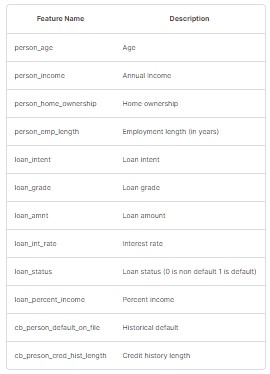

In [87]:
image_path = '/content/drive/MyDrive/Credit Risk Analysis/credit_risk_variables.jpg'
img = Image.open(image_path)
img

**Description of Variables**

- person_age	: Age
- person_income	: Annual Income
- person_home_ownership	: Home ownership
- person_emp_length	: Employment length (in years)
- loan_intent	: Loan intention
- loan_grade : Loan grade
- loan_amnt	: Loan amount
- loan_int_rate	: Interest rate
- loan_status	: Loan status (0 is non default 1 is default)
- loan_percent_income	: Percent income
- cb_person_default_on_file	: Historical default
- cb_preson_cred_hist_length : Credit history length



## 2.1 Handle Missing Values

In [88]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

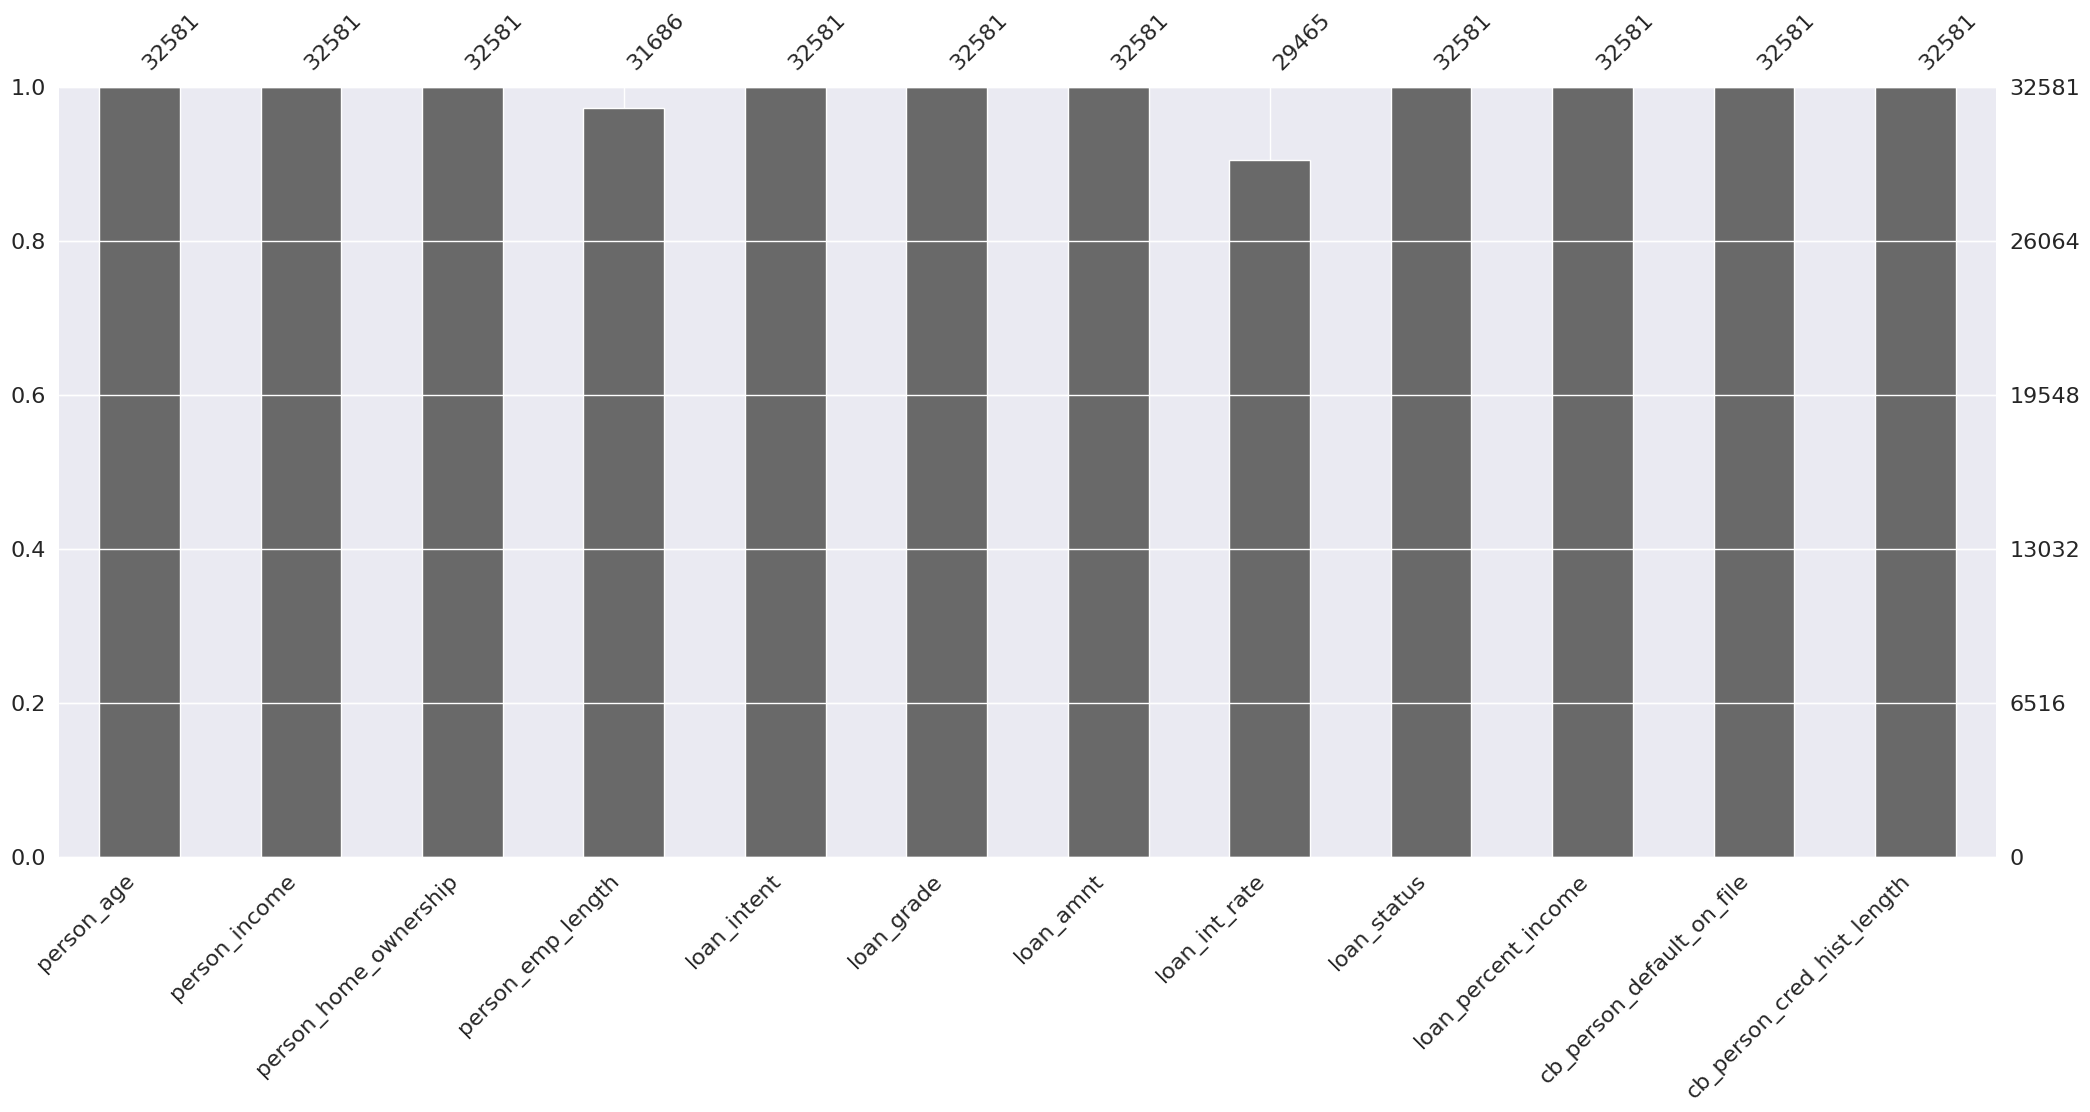

In [89]:
msno.bar(df)
plt.show()

In [90]:
percent_missing_values = df.isna().sum()/len(df)*100
percent_missing_values

person_age                    0.000000
person_income                 0.000000
person_home_ownership         0.000000
person_emp_length             2.747000
loan_intent                   0.000000
loan_grade                    0.000000
loan_amnt                     0.000000
loan_int_rate                 9.563856
loan_status                   0.000000
loan_percent_income           0.000000
cb_person_default_on_file     0.000000
cb_person_cred_hist_length    0.000000
dtype: float64

In [91]:
df.dropna(axis=0, inplace=True)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28638 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28638 non-null  int64  
 1   person_income               28638 non-null  int64  
 2   person_home_ownership       28638 non-null  object 
 3   person_emp_length           28638 non-null  float64
 4   loan_intent                 28638 non-null  object 
 5   loan_grade                  28638 non-null  object 
 6   loan_amnt                   28638 non-null  int64  
 7   loan_int_rate               28638 non-null  float64
 8   loan_status                 28638 non-null  int64  
 9   loan_percent_income         28638 non-null  float64
 10  cb_person_default_on_file   28638 non-null  object 
 11  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


## 2.2 Handle Duplicated Data

In [93]:
df.duplicated().any()

True

In [94]:
duplicate_rows = df[df.duplicated(keep=False)]
print(duplicate_rows)

       person_age  person_income person_home_ownership  person_emp_length  \
14             23         115000                  RENT                2.0   
252            24          85000                  RENT                5.0   
591            26          20000              MORTGAGE                5.0   
817            22          22000                   OWN                1.0   
1094           22          24449                   OWN                2.0   
...           ...            ...                   ...                ...   
31947          40          38000                  RENT                4.0   
32010          42          39996              MORTGAGE                2.0   
32047          36         250000                  RENT                2.0   
32172          49         120000              MORTGAGE               12.0   
32259          39          40000                   OWN                4.0   

             loan_intent loan_grade  loan_amnt  loan_int_rate  loan_status 

In [95]:
df_cleaned = df.drop_duplicates()
df = df_cleaned

In [96]:
df.nunique().sort_values(ascending=False)

person_income                 3835
loan_amnt                      728
loan_int_rate                  348
loan_percent_income             77
person_age                      57
person_emp_length               36
cb_person_cred_hist_length      29
loan_grade                       7
loan_intent                      6
person_home_ownership            4
loan_status                      2
cb_person_default_on_file        2
dtype: int64

In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28501 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28501 non-null  int64  
 1   person_income               28501 non-null  int64  
 2   person_home_ownership       28501 non-null  object 
 3   person_emp_length           28501 non-null  float64
 4   loan_intent                 28501 non-null  object 
 5   loan_grade                  28501 non-null  object 
 6   loan_amnt                   28501 non-null  int64  
 7   loan_int_rate               28501 non-null  float64
 8   loan_status                 28501 non-null  int64  
 9   loan_percent_income         28501 non-null  float64
 10  cb_person_default_on_file   28501 non-null  object 
 11  cb_person_cred_hist_length  28501 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 2.8+ MB


## 2.3 Define Numerical and Categorical Data

In [98]:
x = df.drop(labels = ["loan_status"], axis = 1)
y = df["loan_status"]

df_num = df.select_dtypes(include='number')
df_cat = df.select_dtypes(include=['object','category'])

In [99]:
df_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28501 entries, 0 to 32580
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  28501 non-null  int64  
 1   person_income               28501 non-null  int64  
 2   person_emp_length           28501 non-null  float64
 3   loan_amnt                   28501 non-null  int64  
 4   loan_int_rate               28501 non-null  float64
 5   loan_status                 28501 non-null  int64  
 6   loan_percent_income         28501 non-null  float64
 7   cb_person_cred_hist_length  28501 non-null  int64  
dtypes: float64(3), int64(5)
memory usage: 2.0 MB


In [100]:
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28501 entries, 0 to 32580
Data columns (total 4 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   person_home_ownership      28501 non-null  object
 1   loan_intent                28501 non-null  object
 2   loan_grade                 28501 non-null  object
 3   cb_person_default_on_file  28501 non-null  object
dtypes: object(4)
memory usage: 1.1+ MB


In [101]:
df.describe([0.05, 0.10, 0.25, 0.50, 0.75, 0.80, 0.90, 0.95, 0.99]).T

,count,mean,std,min,5%,10%,25%,50%,75%,80%,90%,95%,99%,max
person_age,28501.0,27.738676,6.316166,20.00,22.00,22.00,23.00,26.00,30.00,32.00,36.00,40.00,50.00,144.00
person_income,28501.0,66654.411319,62376.028215,4000.00,24000.00,29000.00,39500.00,56000.00,80000.00,87000.00,112000.00,140000.00,230004.00,6000000.00
person_emp_length,28501.0,4.790148,4.157462,0.00,0.00,0.00,2.00,4.00,7.00,8.00,10.00,13.00,18.00,123.00
loan_amnt,28501.0,9658.533034,6329.604672,500.00,2000.00,3000.00,5000.00,8000.00,12500.00,15000.00,19500.00,24000.00,29550.00,35000.00
loan_int_rate,28501.0,11.045385,3.230748,5.42,6.03,6.91,7.90,10.99,13.48,13.98,15.31,16.32,18.62,23.22
loan_status,28501.0,0.217115,0.412289,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,1.00,1.00
loan_percent_income,28501.0,0.169517,0.106410,0.00,0.04,0.05,0.09,0.15,0.23,0.25,0.32,0.38,0.50,0.83
cb_person_cred_hist_length,28501.0,5.800498,4.042153,2.00,2.00,2.00,3.00,4.00,8.00,9.00,11.00,14.00,17.00,30.00


# 3) EDA

## 3.1 Dependent Variable

In [102]:
df["loan_status"].describe().T

count    28501.000000
mean         0.217115
std          0.412289
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: loan_status, dtype: float64

In [103]:
df.loan_status.value_counts() / len(df) * 100

0    78.288481
1    21.711519
Name: loan_status, dtype: float64

In [104]:
ex.pie(df,names='loan_status',title='Propotion Of Loan Status',hole=0.33).update_layout(title_x=0.5)

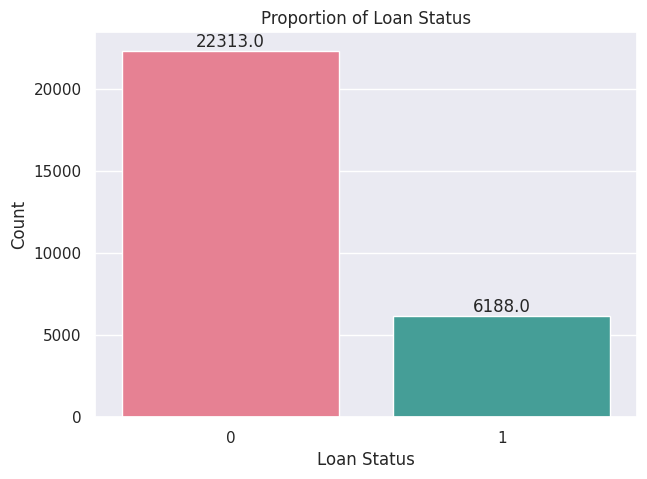

In [105]:
# Create the countplot with labels
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df, x='loan_status', palette='husl')
plt.title('Proportion of Loan Status')

# Calculate and add count labels to each bar
total_count = len(df)
for p in ax.patches:
    count = p.get_height()
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(f'{count}', (x, y), ha='center', va='bottom')

plt.xlabel('Loan Status')
plt.ylabel('Count')
plt.show()

Text(0, 0.5, 'Loan Percent Income')

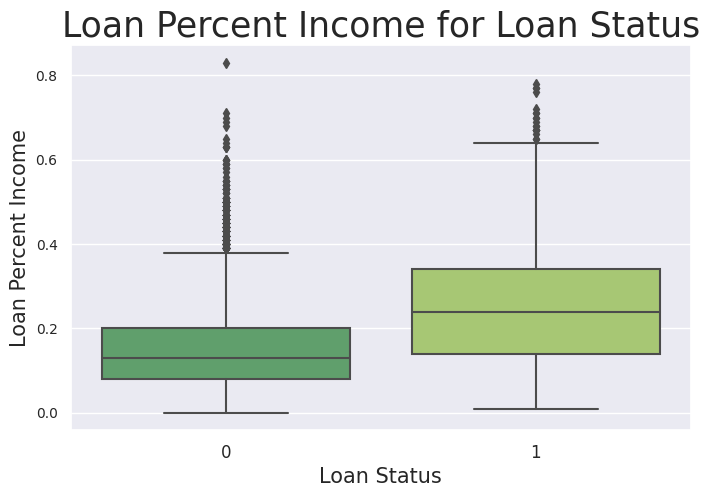

In [106]:
x = df[["loan_status", "loan_percent_income"]]

f, ax = plt.subplots(figsize=(8, 5));
sns.boxplot(x = "loan_status", y = "loan_percent_income", data = x, palette = 'summer');

plt.title('Loan Percent Income for Loan Status', fontsize = 25)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 10);
plt.xlabel("Loan Status", fontsize = 15)
plt.ylabel("Loan Percent Income", fontsize = 15)

In [107]:
cor_target = df.corrwith(df["loan_status"])
cor_target.sort_values(axis = 0, ascending = False)

loan_status                   1.000000
loan_percent_income           0.380000
loan_int_rate                 0.339995
loan_amnt                     0.114153
cb_person_cred_hist_length   -0.016559
person_age                   -0.024091
person_emp_length            -0.082852
person_income                -0.140456
dtype: float64

## 3.2 Categorical Variables

In [108]:
df.describe(include = "O").T

,count,unique,top,freq
person_home_ownership,28501,4,RENT,14498
loan_intent,28501,6,EDUCATION,5670
loan_grade,28501,7,A,9345
cb_person_default_on_file,28501,2,N,23411


In [109]:
df.select_dtypes(include=['object','category']).columns.tolist()

df_cat = df.select_dtypes(include=['object','category'])
df_cat.count()

person_home_ownership        28501
loan_intent                  28501
loan_grade                   28501
cb_person_default_on_file    28501
dtype: int64

In [110]:
ex.pie(df,names='person_home_ownership',title='Propotion Of Person Home Ownership',hole=0.35).update_layout(title_x=0.5)

In [111]:
ex.pie(df,names='loan_intent',title='Propotion Of Loan Intent',hole=0.35).update_layout(title_x=0.5)

In [112]:
ex.pie(df,names='loan_grade',title='Propotion Of Loan Grade',hole=0.35).update_layout(title_x=0.5)

In [113]:
ex.pie(df,names='cb_person_default_on_file',
       title='Propotion Of CB Person Default On File',hole=0.35).update_layout(title_x=0.5)

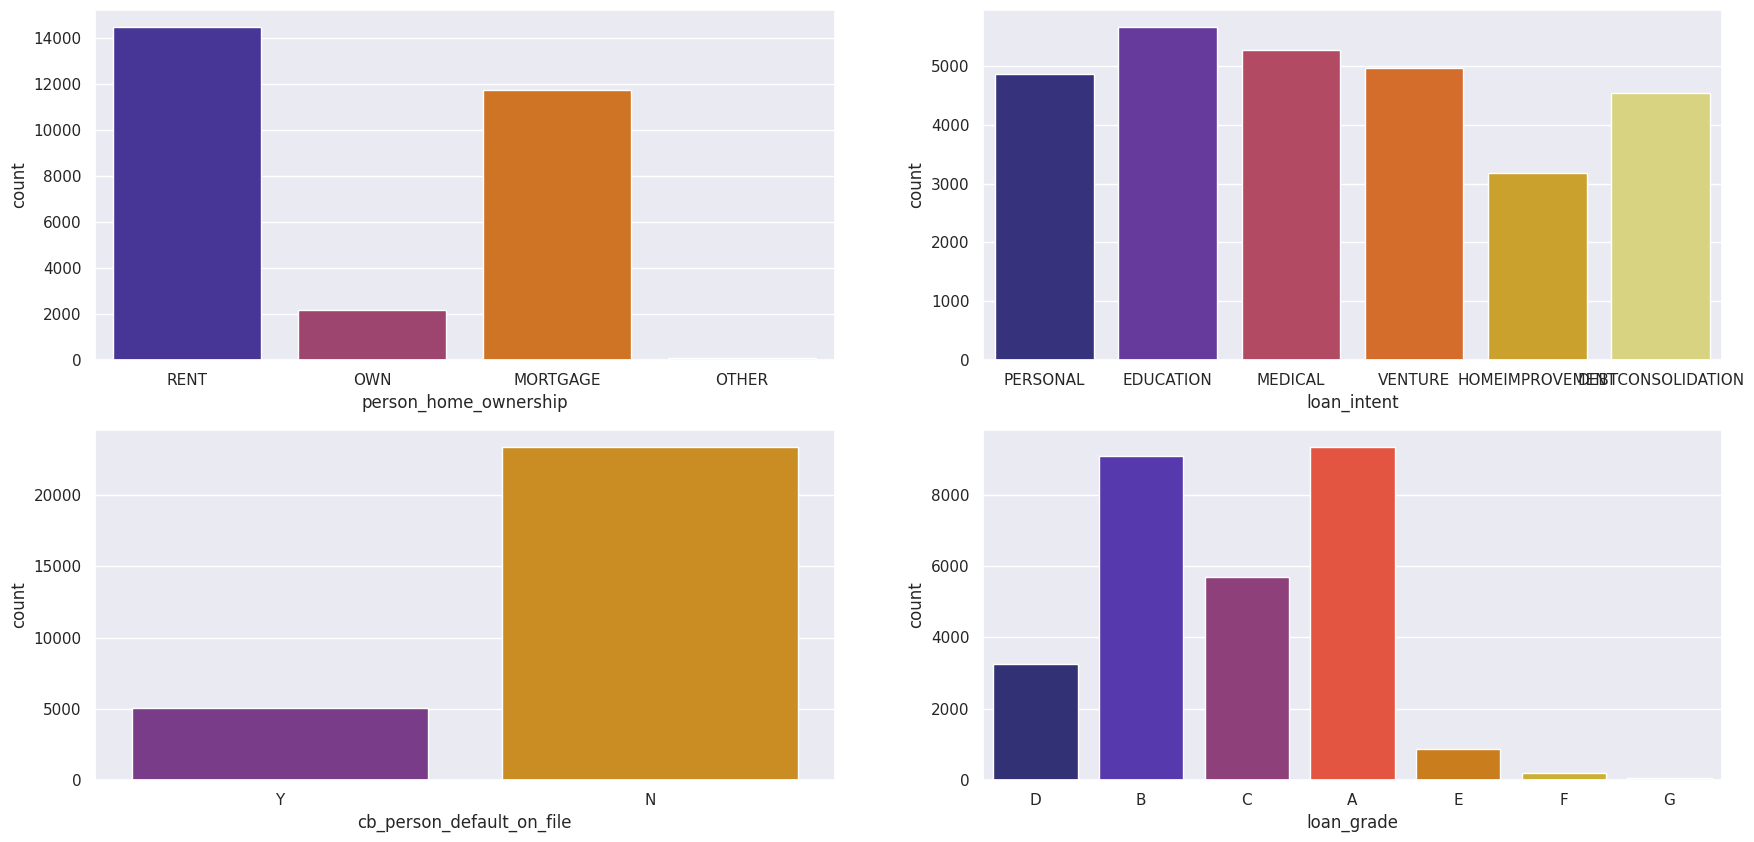

In [114]:
fig, axes = plt.subplots(2, 2, figsize=(21, 10))
sns.countplot(x='person_home_ownership', data=df, ax=axes[0, 0], palette='CMRmap')
sns.countplot(x='loan_intent', data=df, ax=axes[0, 1], palette='CMRmap')
sns.countplot(x='loan_grade', data=df, ax=axes[1, 1], palette='CMRmap')
sns.countplot(x='cb_person_default_on_file', data=df, ax=axes[1, 0], palette='CMRmap')
plt.show()



<Axes: xlabel='person_home_ownership', ylabel='count'>

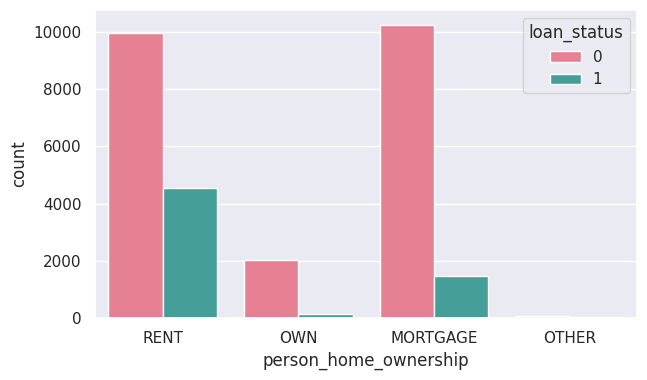

In [115]:
plt.figure(figsize=(7, 4))
sns.countplot(x='person_home_ownership', data=df, hue='loan_status', palette='husl')

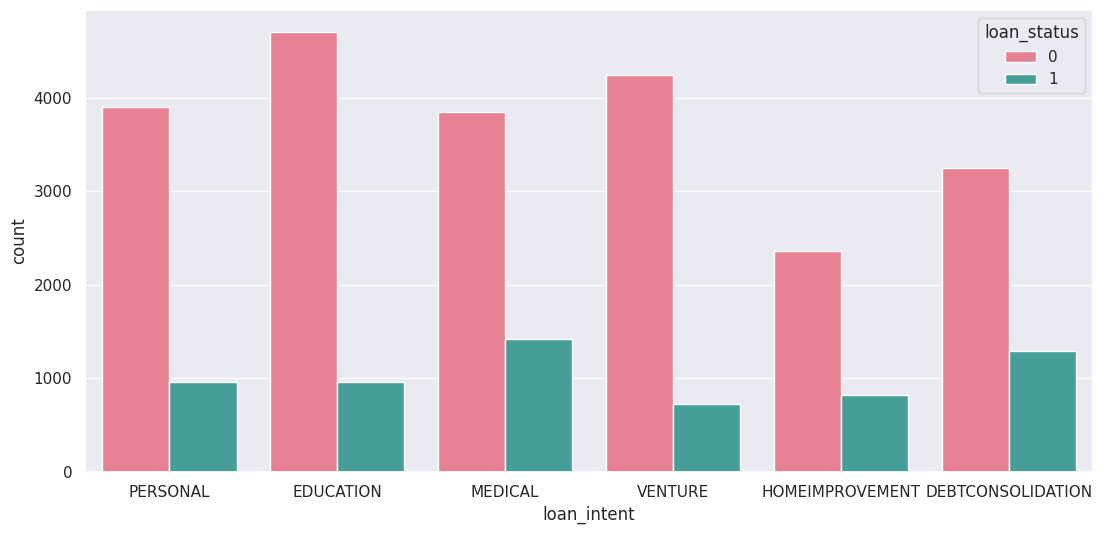

In [116]:
plt.figure(figsize=(13, 6))
sns.countplot(x='loan_intent',data=df, hue='loan_status',palette='husl');

<Axes: xlabel='loan_grade', ylabel='count'>

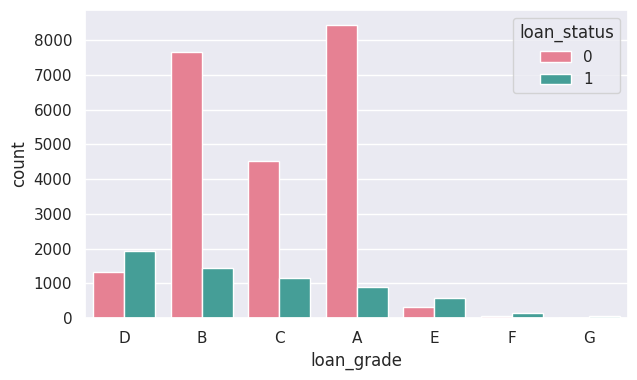

In [117]:
plt.figure(figsize=(7, 4))
sns.countplot(x='loan_grade',data=df, hue='loan_status',palette='husl')

<Axes: xlabel='cb_person_default_on_file', ylabel='count'>

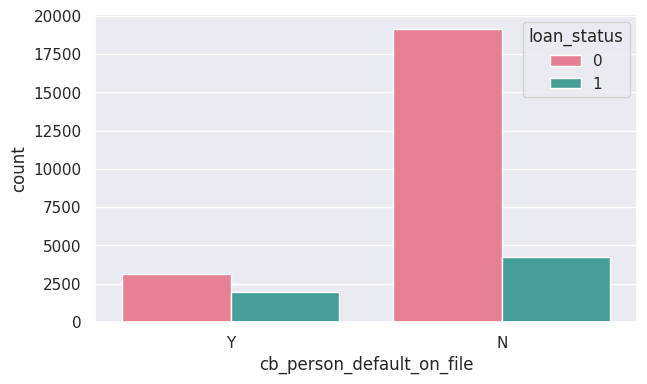

In [118]:
plt.figure(figsize=(7, 4))
sns.countplot(x='cb_person_default_on_file',data=df, hue='loan_status',palette='husl')

## 3.3 Handling Outliers

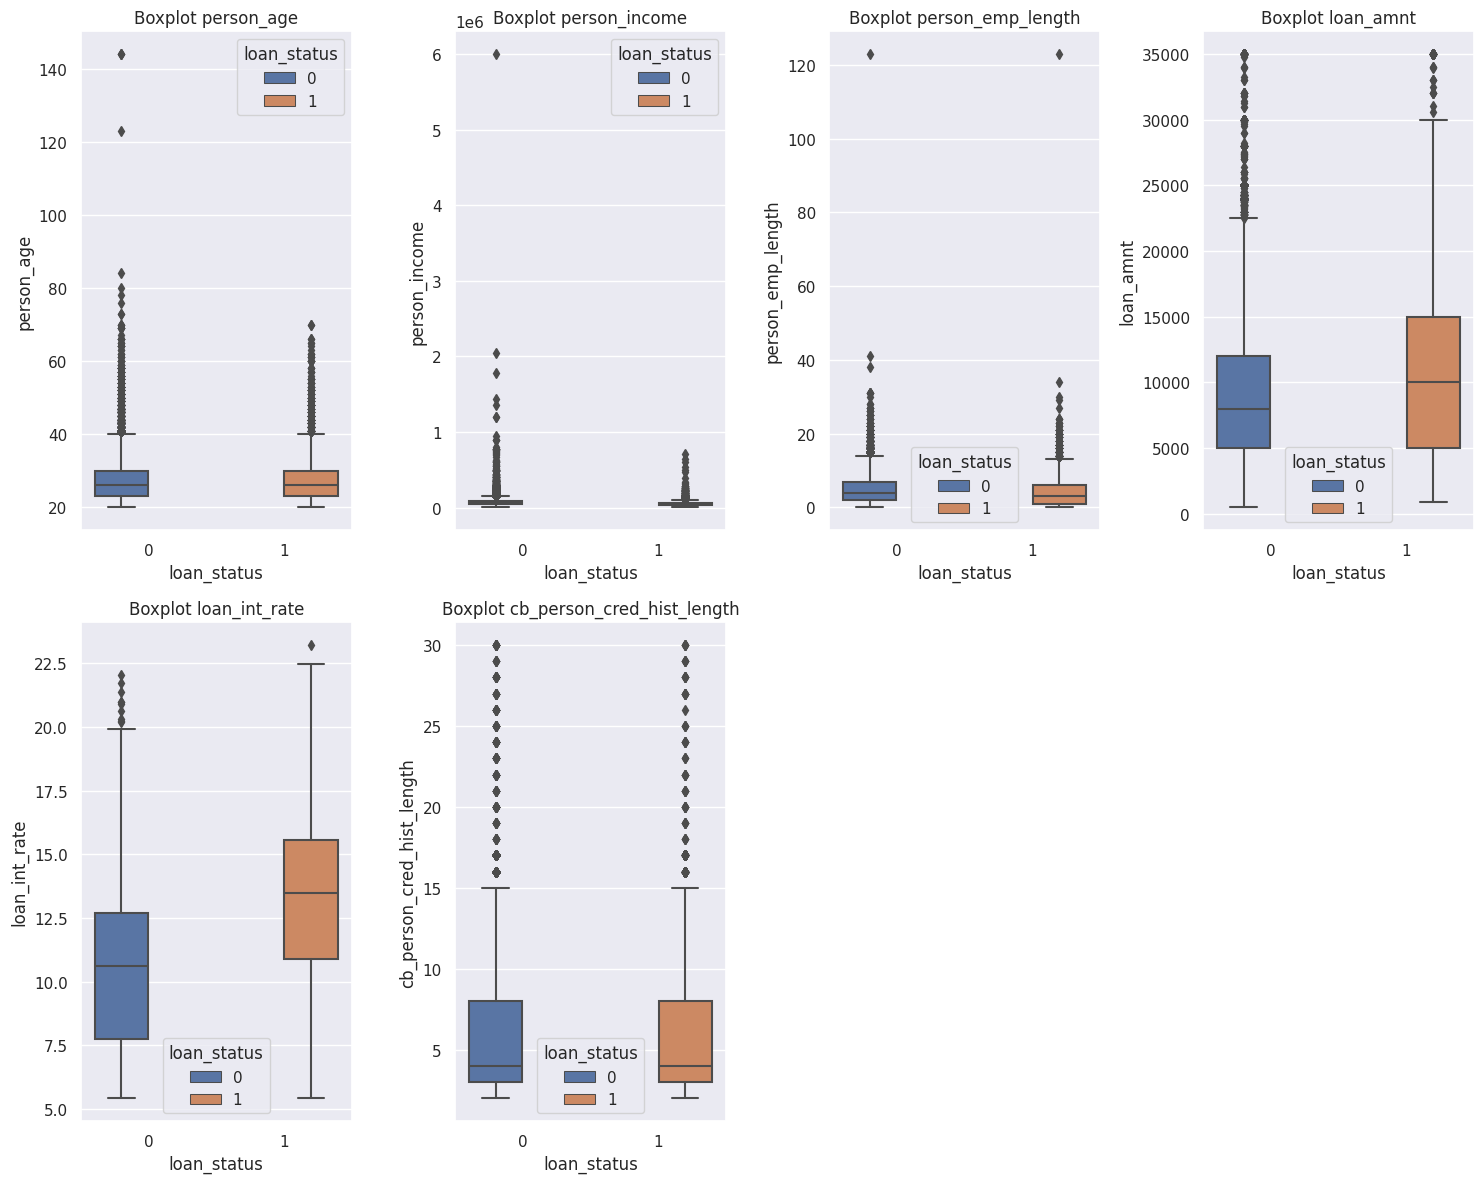

In [119]:
# List of variables
variables = [
    'person_age', 'person_income', 'person_emp_length',
    'loan_amnt', 'loan_int_rate', 'cb_person_cred_hist_length'
]

# Makes 3x4 grid
fig, axarr = plt.subplots(2, 4, figsize=(15, 12))

# Loop to make boxplot for each axes
for i, variable in enumerate(variables):
    sns.boxplot(y=variable, x='loan_status', hue='loan_status', data=df_num, ax=axarr[i // 4, i % 4])
    # Atur judul untuk setiap subplot (opsional)
    axarr[i // 4, i % 4].set_title(f'Boxplot {variable}')

# Delete unused subplots
if len(variables) < 2 * 4:
    for i in range(len(variables), 2 * 4):
        fig.delaxes(axarr[i // 4, i % 4])


plt.tight_layout()
plt.show()


In [123]:
# Drop Outlier
def dropOL(ftr):
    q75,q25 = np.percentile(df_num[ftr],[75,25])
    intr_qr = q75-q25
    mx = q75+(2.0*intr_qr)
    mn = q25-(2.0*intr_qr)
    return mx,mn

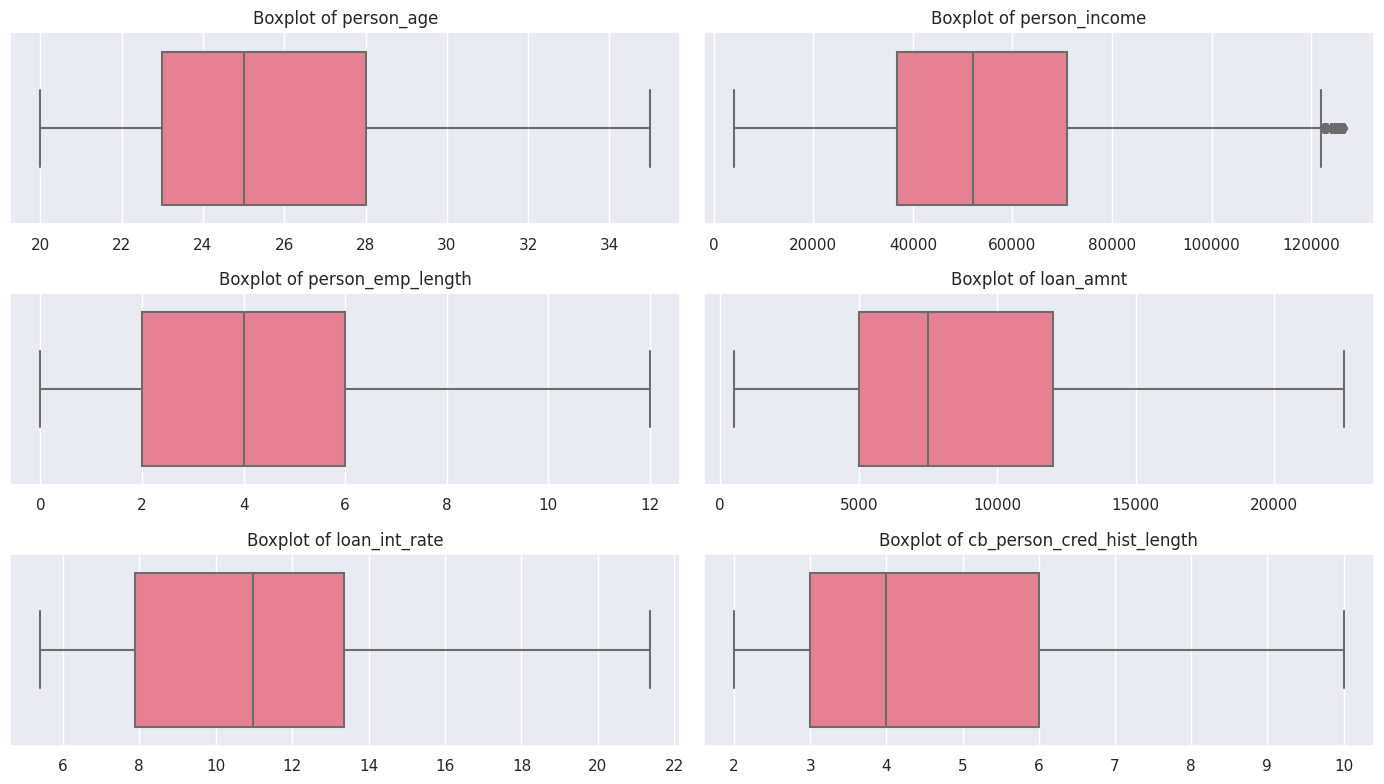

In [124]:
# Numeric columns to drop outliers and plot boxplots for
numeric_columns = ['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
                   'loan_int_rate', 'cb_person_cred_hist_length']

# Drop outliers and plot boxplots for each numeric column
sns.set(rc={"figure.figsize": (14, 8)})
fig, axes = plt.subplots(nrows=3, ncols=2)

for col, ax in zip(numeric_columns, axes.flatten()):
    mx, mn = dropOL(col)
    df_num.drop(df_num[(df_num[col] > mx) | (df_num[col] < mn)].index, inplace=True)
    sns.boxplot(data=df_num, x=col, palette="husl", ax=ax)
    ax.set(title=f'Boxplot of {col}', xlabel=None)

plt.tight_layout()
plt.show()

## 3.4 Numerical Variables

In [125]:
df_num.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
person_age,22168.0,25.80,3.55,20.00,23.00,25.00,28.00,35.00
person_income,22168.0,56013.31,24912.13,4080.00,36786.75,52000.00,71004.00,126500.00
person_emp_length,22168.0,4.15,3.12,0.00,2.00,4.00,6.00,12.00
loan_amnt,22168.0,8491.20,4882.18,500.00,5000.00,7500.00,12000.00,22500.00
loan_int_rate,22168.0,10.95,3.18,5.42,7.90,10.99,13.35,21.36
loan_status,22168.0,0.22,0.41,0.00,0.00,0.00,0.00,1.00
loan_percent_income,22168.0,0.17,0.10,0.01,0.09,0.15,0.22,0.83
cb_person_cred_hist_length,22168.0,4.59,2.46,2.00,3.00,4.00,6.00,10.00


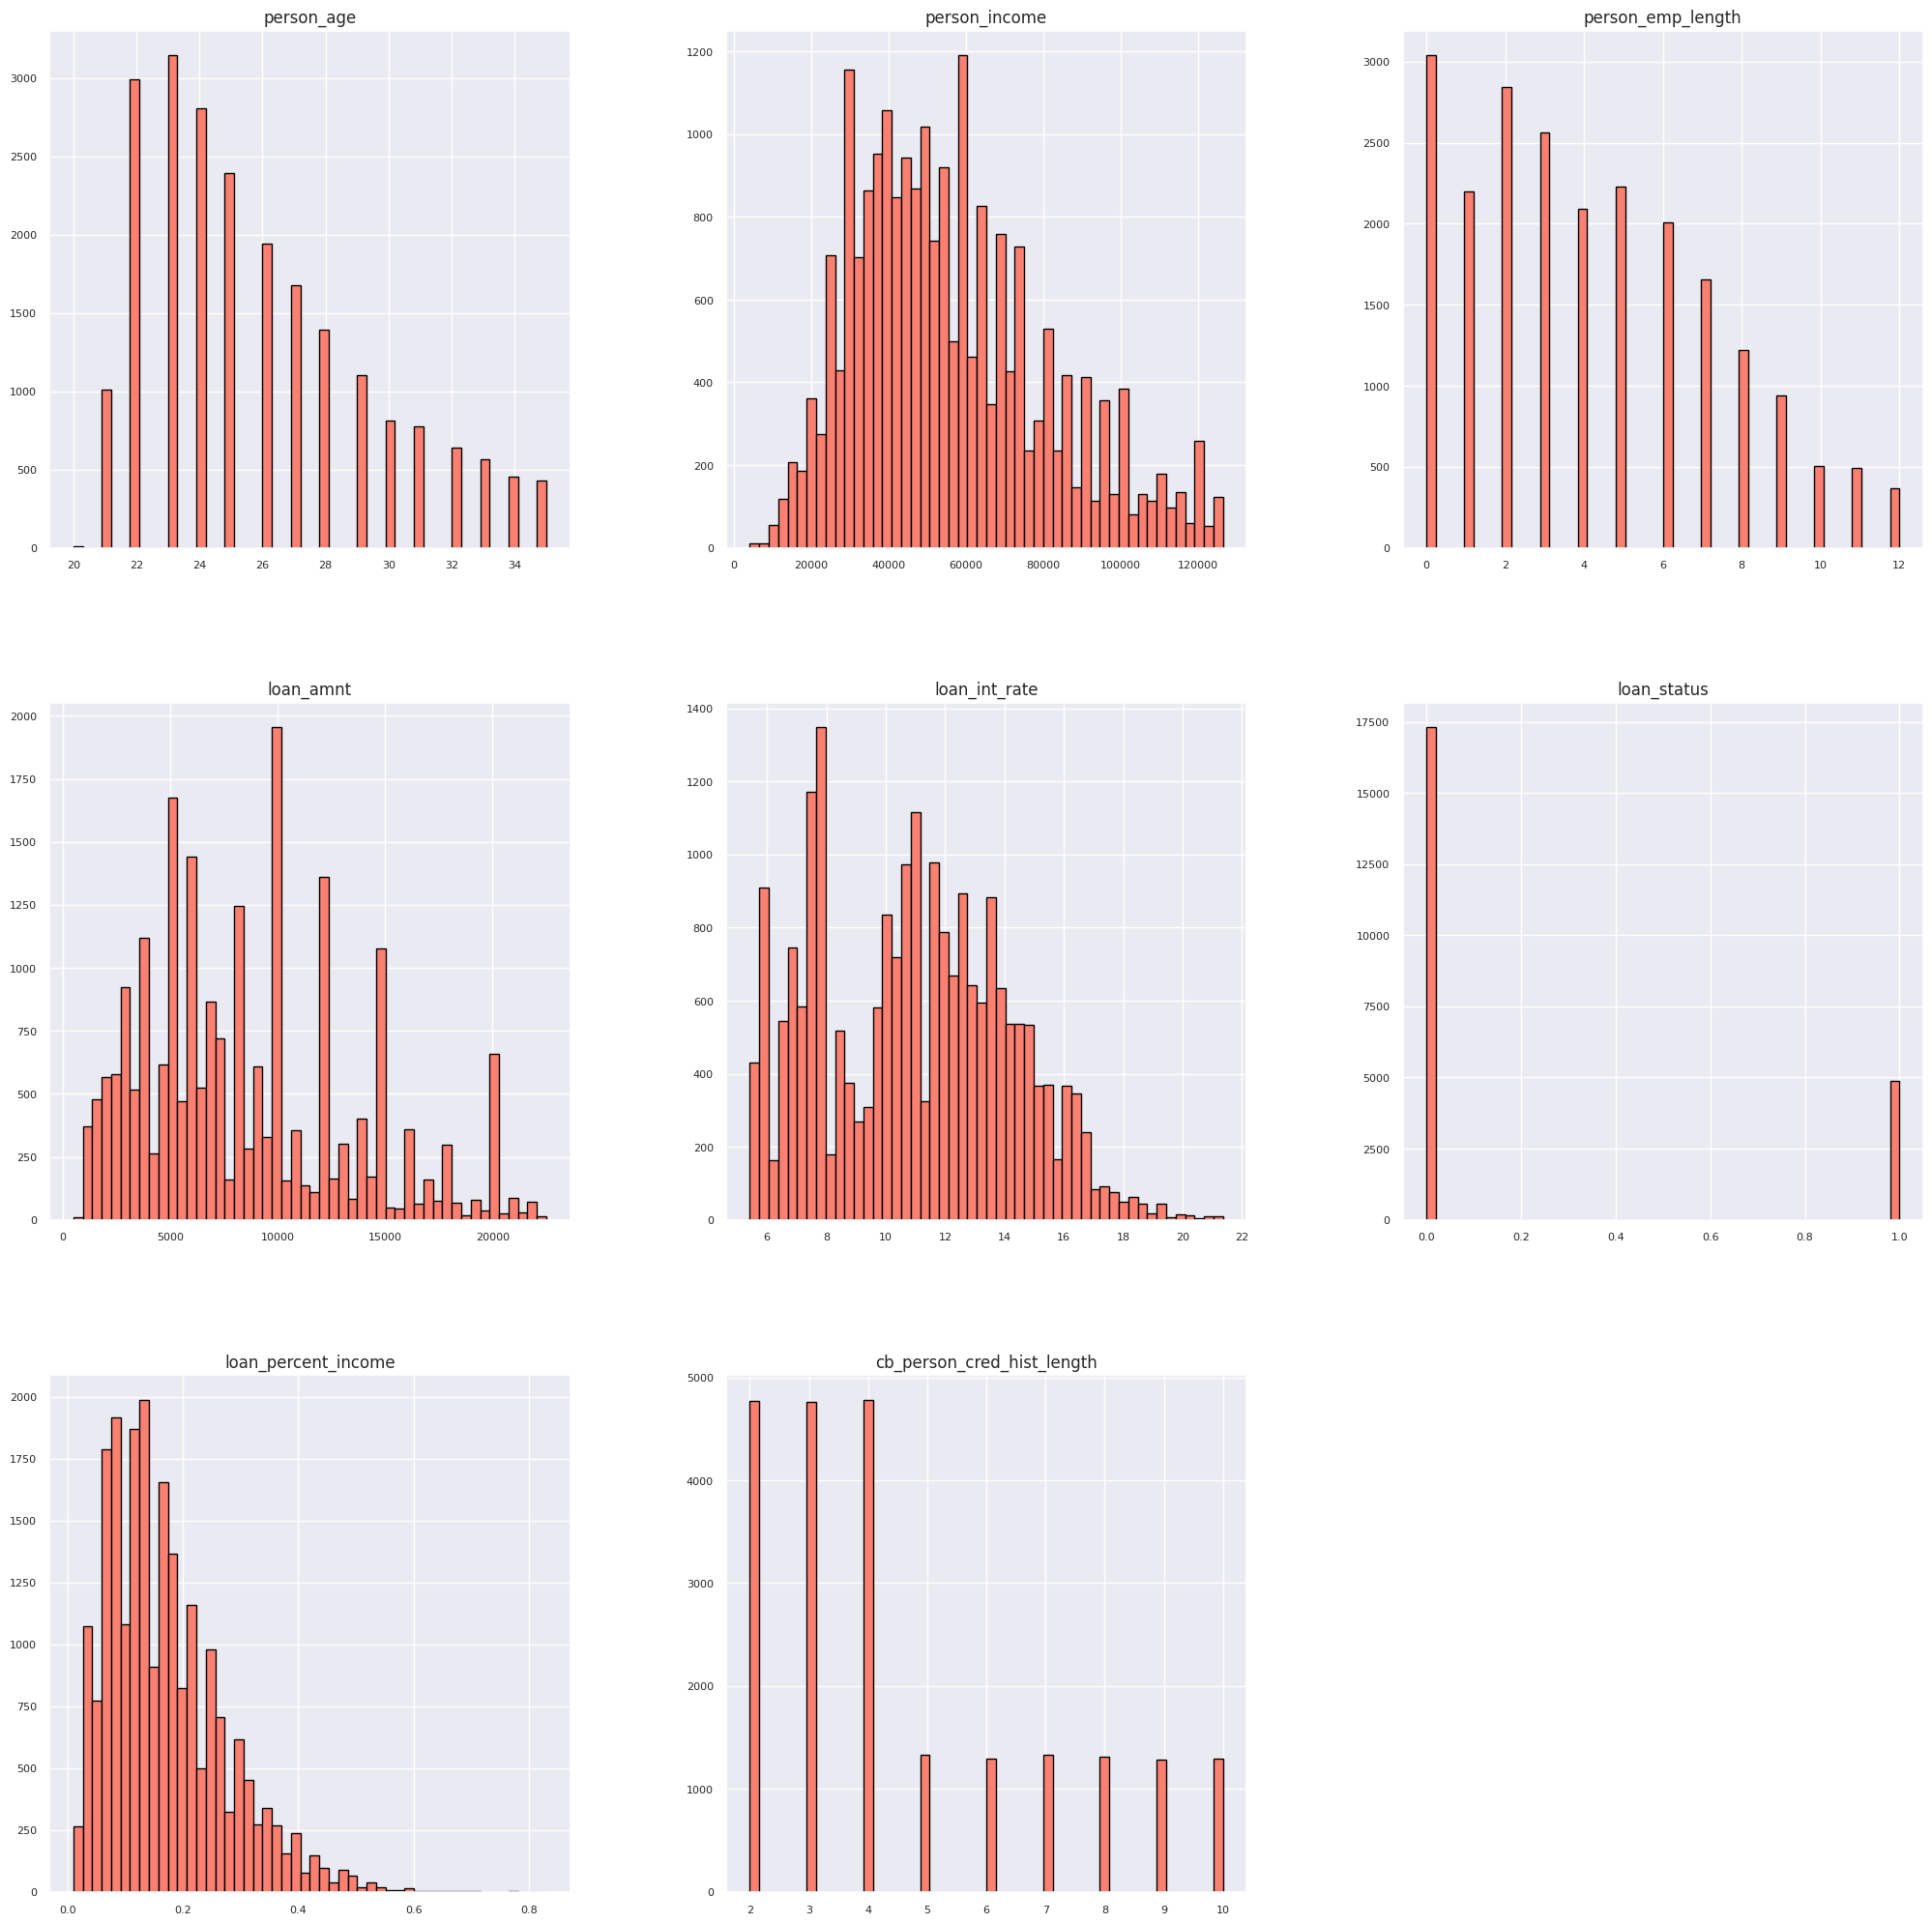

In [126]:
#Plotting all the columns with numerical value

fig = df_num.hist(
    figsize=(25,25),
    bins=50,
    color="salmon",
    edgecolor="black",
    xlabelsize=8,
    ylabelsize=8
)

In [127]:
# Drop variable with variance under 5% (quasi-constant features where 95% of the values are similar or constant)
sel = VarianceThreshold(threshold=0.05) # 0.05: drop column where 95% of the values are constant

# fit finds the features with constant variance
sel.fit(df_num.loc[:, df_num.columns != "loan_status"])
# Get the number of features that are not constant
print(f"Number of retained features: {sum(sel.get_support())}")
print(f"\nNumber of quasi_constant features: {len(df_num.loc[:, df_num.columns !='''loan_status'''].columns) - sum(sel.get_support())}")

quasi_constant_features = df_num.loc[:,df_num.columns != "loan_status"].columns[~sel.get_support()].tolist()
print(f"\nQuasi-constant features to be dropped: {quasi_constant_features}")

Number of retained features: 6

Number of quasi_constant features: 1

Quasi-constant features to be dropped: ['loan_percent_income']


In [128]:
#Dropping Quasi-Constant Variables
df_num.drop(
    columns = quasi_constant_features,
    axis= 1,
    inplace=True
)

In [129]:
df_num.columns

Index(['person_age', 'person_income', 'person_emp_length', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'cb_person_cred_hist_length'],
      dtype='object')

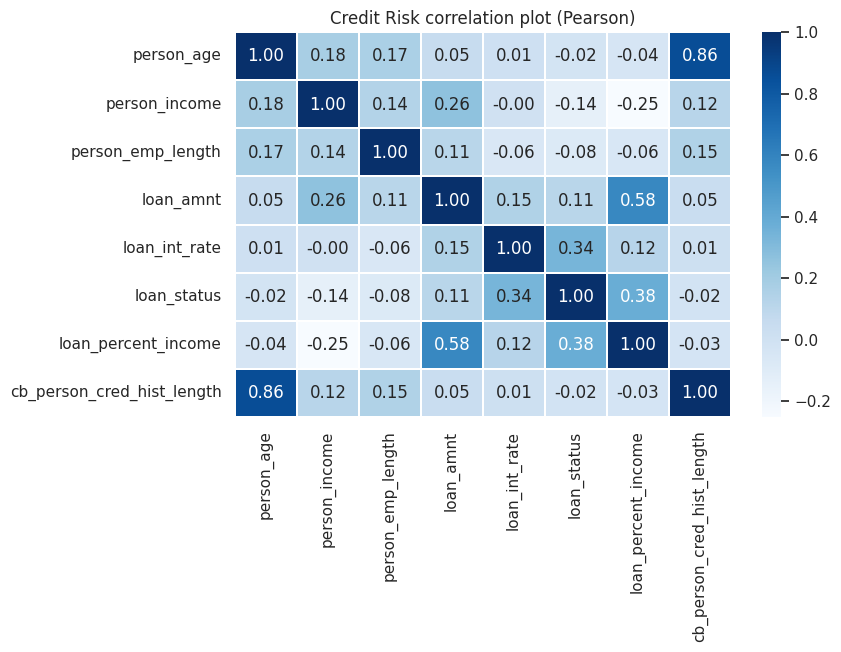

In [130]:
plt.figure(figsize = (8,5))
plt.title('Credit Risk correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr, annot=True, fmt=".2f", xticklabels=corr.columns, yticklabels=corr.columns, linewidths=0.1, cmap="Blues")
plt.show()

In [131]:
credit_risk_corr = df_num.corr()["loan_status"]
credit_risk_corr.abs().sort_values(ascending=False)[1:]

loan_int_rate                 0.330771
person_income                 0.284720
loan_amnt                     0.099856
person_emp_length             0.091586
person_age                    0.025402
cb_person_cred_hist_length    0.015550
Name: loan_status, dtype: float64

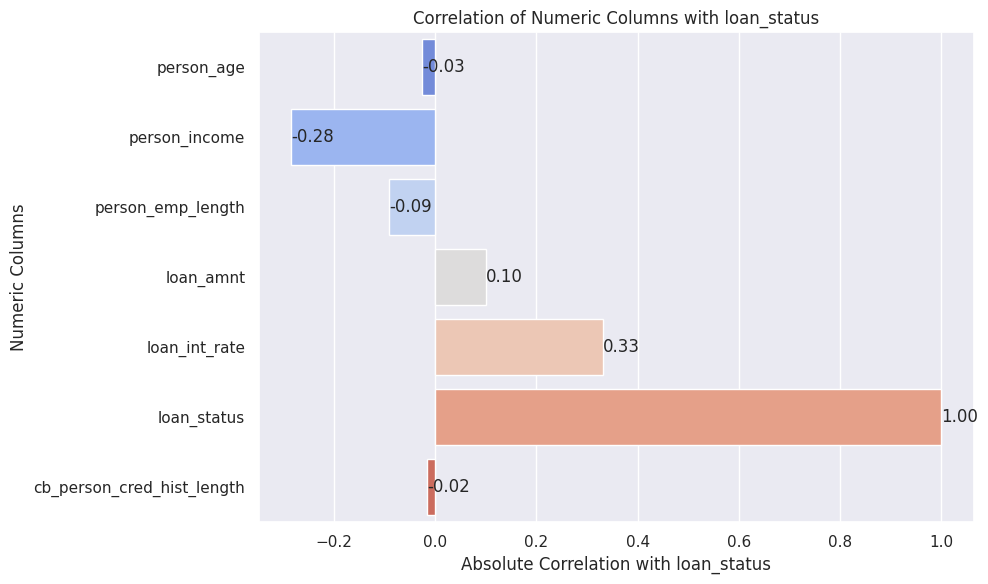

In [132]:
plt.figure(figsize=(10, 6))
sns.barplot(x=credit_risk_corr.values, y=credit_risk_corr.index, palette='coolwarm')
plt.xlabel('Absolute Correlation with loan_status')
plt.ylabel('Numeric Columns')
plt.title('Correlation of Numeric Columns with loan_status')
plt.tight_layout()

for i, v in enumerate(credit_risk_corr.values):
    plt.text(v, i, f"{v:.2f}", va='center')

plt.show()

In [133]:
df_num.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
person_age,22168.0,25.80,3.55,20.00,23.00,25.00,28.00,35.00
person_income,22168.0,56013.31,24912.13,4080.00,36786.75,52000.00,71004.00,126500.00
person_emp_length,22168.0,4.15,3.12,0.00,2.00,4.00,6.00,12.00
loan_amnt,22168.0,8491.20,4882.18,500.00,5000.00,7500.00,12000.00,22500.00
loan_int_rate,22168.0,10.95,3.18,5.42,7.90,10.99,13.35,21.36
loan_status,22168.0,0.22,0.41,0.00,0.00,0.00,0.00,1.00
cb_person_cred_hist_length,22168.0,4.59,2.46,2.00,3.00,4.00,6.00,10.00


## 3.5 Distribution of Variables

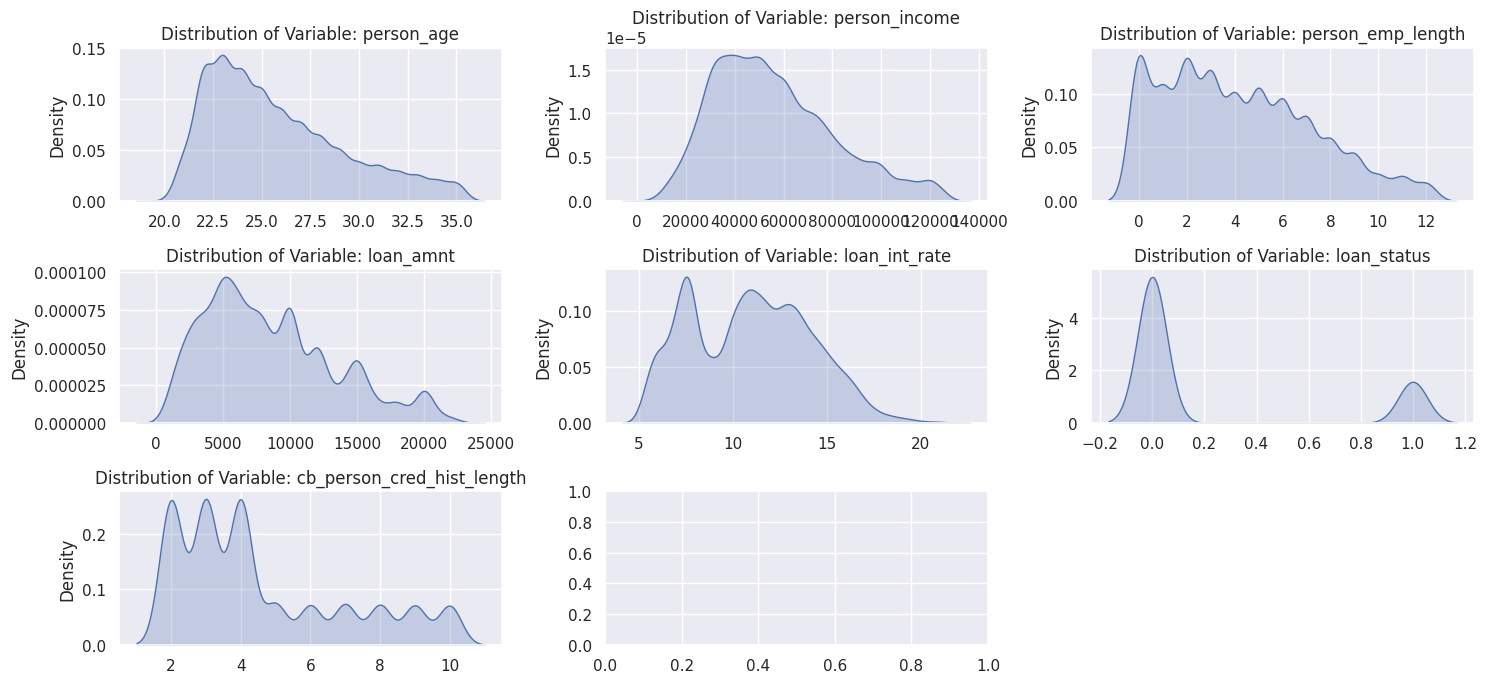

In [134]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 7), sharex = False, sharey = False)
axes = axes.ravel()
cols = df_num.columns[:]

for col, ax in zip(cols, axes):
    data = df_num
    sns.kdeplot(data=data, x=col, shade=True, ax=ax)
    ax.set(title=f'Distribution of Variable: {col}', xlabel=None)

fig.delaxes(axes[8])
fig.tight_layout()
plt.show()